In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date 
import seaborn as sns
import time

In [2]:
df = pd.read_csv('/Users/nmsievers/DAT-02-14/Homework/Unit2/data/bikeshare.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [3]:
#Getting to know the data set. What do the data types look like? How many nulls? #Datetime should be moved to a time data type. We should split out hour into a new column. No nulls. 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 850.6+ KB


In [4]:
#Make datetime in to a date data type.
df['datetime'] = df['datetime'].apply(pd.to_datetime)
#Make hour into a new column 
df['hour'] = df['datetime'].dt.hour
#Make another column with date as number 
df['date_int']=df['datetime'].apply(lambda  var: time.mktime(var.timetuple()))
#Day only, no time
df['date'] = df['datetime'].dt.date

In [5]:
print(df['weather'].value_counts())
df[df['weather']=='Heavy Storms/Rain']
#Data seems off for this type of weather. Seems unlikley that there were 164 rides at 6pm during a heavy storm in spring. 

Clear Skies          7192
Partly Cloudy        2834
Light Storms/Rain     859
Heavy Storms/Rain       1
Name: weather, dtype: int64


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date_int,date
5631,2012-01-09 18:00:00,Spring,0,1,Heavy Storms/Rain,8.2,11.365,86,6.0032,164,18,1.326150e+09,2012-01-09


In [6]:
#dropping heavy storms/rain
df = df.drop(index=5631)

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date_int,date
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,0,1.293858e+09,2011-01-01
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,1,1.293862e+09,2011-01-01
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,2,1.293865e+09,2011-01-01
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,3,1.293869e+09,2011-01-01
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,4,1.293872e+09,2011-01-01


Data exploration

In [8]:
#What is the timeframe of our data? 
print('Min date:', min(df['datetime']))
print('Max date:' ,max(df['datetime']))

#We have approximatly two years of data (2011 and 2012). 

Min date: 2011-01-01 00:00:00
Max date: 2012-12-19 23:00:00


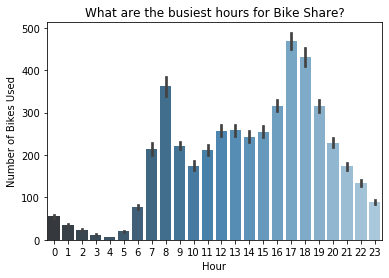

In [9]:
#What hours are the busiest? 
ax = sns.barplot(x='hour',y='count',data=df,palette="Blues_d");
ax.set(xlabel='Hour',ylabel='Number of Bikes Used',title='What are the busiest hours for Bike Share?');
#busiest times for bike share are in the morning around 8am and in the evening around 5pm and 6pm. 
#This makes sense. Most people are using bike share during peak commuting times, similar to what we would see for cars and traffic in general.


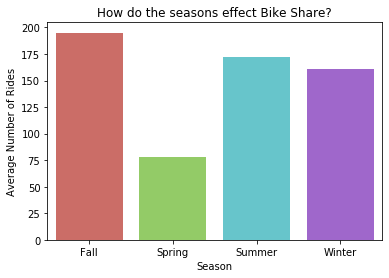

In [10]:
#How do the seasons effect the number of bike used? Weather?
data_season = df.groupby(df['season'],as_index=False).median()
ax = sns.barplot(x='season',y='count',data=data_season, palette='hls');
ax.set(xlabel='Season',ylabel='Average Number of Rides',title='How do the seasons effect Bike Share?');

#More Riding in Winter than Spring? Hmmm....

In [11]:
#These seasons are off 
print('Spring Min:',min(df[df['season'] == 'Spring'][df['datetime'].dt.year == 2011]['datetime']))
print('Spring Max:',max(df[df['season'] == 'Spring'][df['datetime'].dt.year == 2011]['datetime']))
print('Summer Min:',min(df[df['season'] == 'Summer'][df['datetime'].dt.year == 2011]['datetime']))
print('Summer Max:',max(df[df['season'] == 'Summer'][df['datetime'].dt.year == 2011]['datetime']))
print('Fall Min:',min(df[df['season'] == 'Fall'][df['datetime'].dt.year == 2011]['datetime']))
print('Fall Max:',max(df[df['season'] == 'Fall'][df['datetime'].dt.year == 2011]['datetime']))
print('Winter Min:',min(df[df['season'] == 'Winter'][df['datetime'].dt.year == 2011]['datetime']))
print('Winter Max:',max(df[df['season'] == 'Winter'][df['datetime'].dt.year == 2011]['datetime']))

Spring Min: 2011-01-01 00:00:00
Spring Max: 2011-03-19 23:00:00
Summer Min: 2011-04-01 00:00:00
Summer Max: 2011-06-19 23:00:00
Fall Min: 2011-07-01 00:00:00
Fall Max: 2011-09-19 23:00:00
Winter Min: 2011-10-01 00:00:00
Winter Max: 2011-12-19 23:00:00


/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykern

In [12]:
#redefining the seasons
df['season_num'] = (df['datetime'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Fall'
}

df['season_name'] = df['season_num'].map(seasons)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date_int,date,season_num,season_name
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0000,16,0,1.293858e+09,2011-01-01,1,Winter
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0000,40,1,1.293862e+09,2011-01-01,1,Winter
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0000,32,2,1.293865e+09,2011-01-01,1,Winter
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0000,13,3,1.293869e+09,2011-01-01,1,Winter
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0000,1,4,1.293872e+09,2011-01-01,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear Skies,15.58,19.695,50,26.0027,336,19,1.355962e+09,2012-12-19,1,Winter
10882,2012-12-19 20:00:00,Winter,0,1,Clear Skies,14.76,17.425,57,15.0013,241,20,1.355965e+09,2012-12-19,1,Winter
10883,2012-12-19 21:00:00,Winter,0,1,Clear Skies,13.94,15.910,61,15.0013,168,21,1.355969e+09,2012-12-19,1,Winter
10884,2012-12-19 22:00:00,Winter,0,1,Clear Skies,13.94,17.425,61,6.0032,129,22,1.355972e+09,2012-12-19,1,Winter


In [13]:
#Remove Season column 
df = df.drop('season',1)

In [14]:
df.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date_int,date,season_num,season_name
0,2011-01-01 00:00:00,0,0,Clear Skies,9.84,14.395,81,0.0,16,0,1.293858e+09,2011-01-01,1,Winter
1,2011-01-01 01:00:00,0,0,Clear Skies,9.02,13.635,80,0.0,40,1,1.293862e+09,2011-01-01,1,Winter
2,2011-01-01 02:00:00,0,0,Clear Skies,9.02,13.635,80,0.0,32,2,1.293865e+09,2011-01-01,1,Winter
3,2011-01-01 03:00:00,0,0,Clear Skies,9.84,14.395,75,0.0,13,3,1.293869e+09,2011-01-01,1,Winter
4,2011-01-01 04:00:00,0,0,Clear Skies,9.84,14.395,75,0.0,1,4,1.293872e+09,2011-01-01,1,Winter


In [15]:
#Checking dates
print('Spring Min:',min(df[df['season_name'] == 'Spring'][df['datetime'].dt.year == 2011]['datetime']))
print('Spring Max:',max(df[df['season_name'] == 'Spring'][df['datetime'].dt.year == 2011]['datetime']))
print('Summer Min:',min(df[df['season_name'] == 'Summer'][df['datetime'].dt.year == 2011]['datetime']))
print('Summer Max:',max(df[df['season_name'] == 'Summer'][df['datetime'].dt.year == 2011]['datetime']))
print('Fall Min:',min(df[df['season_name'] == 'Fall'][df['datetime'].dt.year == 2011]['datetime']))
print('Fall Max:',max(df[df['season_name'] == 'Fall'][df['datetime'].dt.year == 2011]['datetime']))
print('Winter Min:',min(df[df['season_name'] == 'Winter'][df['datetime'].dt.year == 2011]['datetime']))
print('Winter Max:',max(df[df['season_name'] == 'Winter'][df['datetime'].dt.year == 2011]['datetime']))

Spring Min: 2011-03-01 00:00:00
Spring Max: 2011-05-19 23:00:00
Summer Min: 2011-06-01 00:00:00
Summer Max: 2011-08-19 23:00:00
Fall Min: 2011-09-01 00:00:00
Fall Max: 2011-11-19 23:00:00
Winter Min: 2011-01-01 00:00:00
Winter Max: 2011-12-19 23:00:00


/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nmsievers/opt/anaconda3/lib/python3.7/site-packages/ipykern

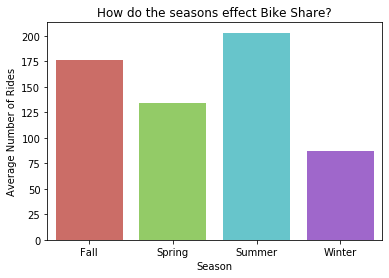

In [16]:
#How do the seasons effect the number of bike used? Weather? # More people ride in Summer, Fall, Spring than winter
data_season = df.groupby(df['season_name'],as_index=False).median()
ax = sns.barplot(x='season_name',y='count',data=data_season, palette='hls');
ax.set(xlabel='Season',ylabel='Average Number of Rides',title='How do the seasons effect Bike Share?');

In [17]:
df.groupby(df['weather'],as_index=False).median()

,weather,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,date_int,season_num
0,Clear Skies,0,1,20.50,24.240,56,12.9980,161,12,1.325439e+09,3
1,Light Storms/Rain,0,1,19.68,23.485,87,12.9980,71,12,1.321499e+09,2
2,Partly Cloudy,0,1,18.86,22.725,70,11.0014,134,11,1.326182e+09,2


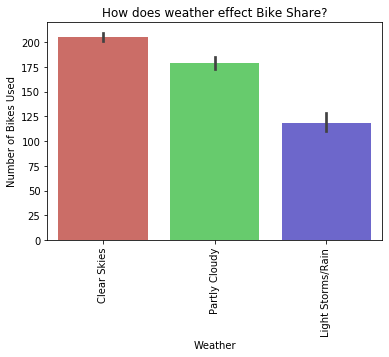

In [18]:
#How do the seasons effect the number of bike used? Weather?
ax = sns.barplot(x='weather',y='count',data=df,palette='hls');
ax.set(xlabel='Weather',ylabel='Number of Bikes Used',title='How does weather effect Bike Share?');
ax.tick_params(axis='x', rotation=90)
#More ridership when the weather is better

In [19]:
#Average ridership on holidays
df.groupby(df['holiday']).median()['count']

#On average less riders on holidays 

holiday
0    145
1    133
Name: count, dtype: int64

In [20]:
df.groupby(df['workingday']).median()['count']

#more riders on working days on average

workingday
0    128
1    151
Name: count, dtype: int64

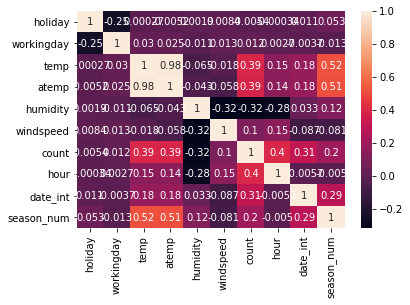

In [21]:
#What features have the best correlation to count? 
sns.heatmap(df.corr(), annot = True)

#hour, atemp, temp, humidity have the best correlation to count

Bike Share Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [23]:
#Basic Model with time and count of bikes

In [24]:
#group by date
df_simple = df.groupby('date').sum()['count'].reset_index()

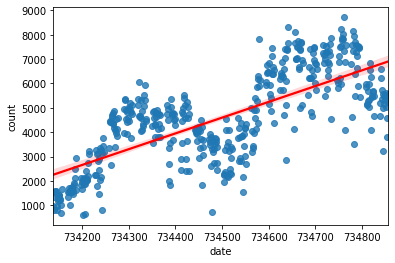

In [25]:
#View of the model 
sns.regplot(x=df_simple['date'].apply(date2num),y=df_simple['count'],data=df_simple,line_kws={"color": "red"})

In [26]:
X_simple = df_simple[['date']].apply(date2num)
y_simple = df_simple['count']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#Coefficents
lr.coef_

array([6.43224101])

In [28]:
#intercept
lr.intercept_

-4719865.665960623

In [29]:
#r2
lr.score(X_train, y_train)
#Score 

0.5336994844034104

In [30]:
#How does that compare if we only took the mean of all days
df_simple['count'].mean()
#on average 4573 trips per day 

4573.0526315789475

In [31]:
test_preds = lr.predict(X_test)
train_preds = lr.predict(X_train)

In [32]:
mean_squared_error(y_test, test_preds)

1598454.9588008625

In [33]:
mean_squared_error(y_train, train_preds) #higher mse on train set

1632865.2563252528

In [34]:
#Cross val
cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error')

array([-1789557.84711383, -1547443.21053683, -1644159.06522582,
       -1677140.35673488, -1716863.46416245])

In [35]:
#Mean cross val score #A little worse than our train set 
np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error'))

-1675032.7887547635

In [36]:
#See how our results compared 
df_results = pd.DataFrame({'Date': X_test.iloc[:,0].apply(num2date),'Actual': y_test, 'Predicted': test_preds})
df_results

,Date,Actual,Predicted
258,2012-02-12 00:00:00+00:00,1529,4904.809592
222,2011-12-14 00:00:00+00:00,3740,4518.875131
375,2012-08-15 00:00:00+00:00,7347,6094.774179
201,2011-11-12 00:00:00+00:00,4067,4313.043419
391,2012-09-12 00:00:00+00:00,7870,6274.876928
...,...,...,...
349,2012-07-08 00:00:00+00:00,4672,5850.349021
256,2012-02-10 00:00:00+00:00,3831,4891.945110
373,2012-08-13 00:00:00+00:00,6883,6081.909697
35,2011-02-17 00:00:00+00:00,2475,2589.202827


In [37]:
next_day_bikes = np.array([X_simple.max()+1])
lr.predict(next_day_bikes)
#model predicts that in the next day in the dataset there will be 6,911 trips. 
#seems like it's in the ballpark 

array([6911.66878823])

In [152]:
#Multiple Regression Model

In [ ]:
#group by date
df_multiple = df.groupby(by=(['date','season_num'])).agg(avg_temp=('temp','mean'), count=('count','sum'),avg_humidity=('humidity','mean')).reset_index()

In [62]:
#Make x multiple tabel with date as a number
x_m = df_multiple.drop(columns='count')
x_m['date'] = x_m['date'].apply(date2num)

In [65]:
#Make model
X_multiple = x_m
y_multiple = df_multiple['count']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y_multiple)

lr = LinearRegression()

lr.fit(X_train_m, y_train_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
#Coefficents multiple
lr.coef_
#date coefficent is lower than with the single regression 6->5

array([  5.34704567, 112.42504711, 123.99057807, -23.53238485])

In [68]:
#intercept multiple
lr.intercept_

-3924155.0065151146

In [70]:
#r2
lr.score(X_train_m, y_train_m)
#higher than simple regression.

0.7914515368549752

In [ ]:
test_preds_m = lr.predict(X_test_m)
train_preds_m = lr.predict(X_train_m)

In [71]:
mean_squared_error(y_test_m, test_preds_m)
#Much lower mse than single

650018.4152314928

In [72]:
mean_squared_error(y_train_m, train_preds_m)

739698.9370214931

In [73]:
#Cross val multiple
cross_val_score(lr, X_train_m, y_train_m, scoring = 'neg_mean_squared_error')

array([-750263.02592644, -781311.19442517, -555287.89991096,
       -939020.61289746, -760751.17464554])

In [75]:
np.mean(cross_val_score(lr, X_train_m, y_train_m, scoring = 'neg_mean_squared_error'))
#much lower than single. 

-757326.781561116

In [79]:
#See how our results look with multiple regression model
df_results_m = pd.DataFrame({'Date': X_test_m.iloc[:,0].apply(num2date),'Actual': y_test_m, 'Predicted': test_preds_m})
df_results_m.sort_values(by='Date')

,Date,Actual,Predicted
1,2011-01-02 00:00:00+00:00,801,1641.907165
2,2011-01-03 00:00:00+00:00,1349,1406.759621
3,2011-01-04 00:00:00+00:00,1562,1070.165691
4,2011-01-05 00:00:00+00:00,1600,1573.720230
5,2011-01-06 00:00:00+00:00,1606,1272.804881
...,...,...,...
442,2012-12-06 00:00:00+00:00,5375,5299.850627
444,2012-12-08 00:00:00+00:00,5582,5003.054285
450,2012-12-14 00:00:00+00:00,5611,5158.227516
451,2012-12-15 00:00:00+00:00,5047,5361.978855


In [80]:
next_day_bikes_m = np.array([X_multiple.max()+1])
lr.predict(next_day_bikes_m)
#multiple regression model predicts that there will be about 1k more bike share trips in the next day of the data set. 6,911->7,918 

array([7918.27851434])

In [82]:
df_results_m['residuals'] = df_results_m['Actual'] - df_results_m['Predicted']
df_results_m['residuals'].mean()
#on average the multiple model is predicting 58 more bike trips than the actual # of bike trips

58.03623582545684

In [83]:
df_results['residuals'] = df_results['Actual'] - df_results['Predicted']
df_results['residuals'].mean()
#on average the simple model is predicting 77 less bike trips than the actual # of bike trips

-77.02900421442138

In [84]:
#Multiple regression model is over estimating while the simple model is underestimating. 
#Which is better?? 